In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
folder = '../data/raw_data/'

df_categories = pd.read_csv(f'{folder}df_categories_ai.csv')
df_comments = pd.read_csv(f'{folder}df_comments_video_ai.csv', engine='python', on_bad_lines='skip')
df_transcript = pd.read_csv(f'{folder}df_transcript_full.csv')
df_videos = pd.read_csv(f'{folder}df_video_ai.csv')
df_search = pd.read_csv(f'{folder}df_video_search_ids_ai.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data_ai.csv')

# Clean df_channel_data

In [43]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        2010 non-null   object
 1   title             2010 non-null   object
 2   description       1857 non-null   object
 3   published_at      2010 non-null   object
 4   subscriber_count  2010 non-null   int64 
 5   video_count       2010 non-null   int64 
 6   view_count        2010 non-null   int64 
 7   region            1583 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.8+ KB


In [44]:
# Drop wrong fetch data 
df_channel.dropna(subset=['view_count'], inplace=True)

# Change to datetime
df_channel['published_at'] = pd.to_datetime(df_channel['published_at'], format='mixed')

# Export cleaned data
df_channel.to_csv('../data/clean_data/df_channel_data.csv', index=False)

# Show info cleaned
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   channel_id        2010 non-null   object             
 1   title             2010 non-null   object             
 2   description       1857 non-null   object             
 3   published_at      2010 non-null   datetime64[ns, UTC]
 4   subscriber_count  2010 non-null   int64              
 5   video_count       2010 non-null   int64              
 6   view_count        2010 non-null   int64              
 7   region            1583 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 125.8+ KB


# Clean df_video_data

In [7]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   videoId         2711 non-null   object
 1   title           2711 non-null   object
 2   channelId       2711 non-null   object
 3   description     2535 non-null   object
 4   publishedAt     2711 non-null   object
 5   thumbnail_url   2711 non-null   object
 6   tags            2711 non-null   object
 7   live_broadcast  2711 non-null   object
 8   categoryId      2711 non-null   int64 
 9   viewCount       2711 non-null   int64 
 10  likeCount       2711 non-null   int64 
 11  commentCount    2711 non-null   int64 
 12  licensed        2711 non-null   bool  
 13  duration        2711 non-null   object
 14  caption         2711 non-null   bool  
 15  language        2711 non-null   object
dtypes: bool(2), int64(4), object(10)
memory usage: 301.9+ KB


In [8]:
import isodate

# Remove duplicated video 
df_videos.drop_duplicates(subset=['videoId'], keep='first', inplace=True)

# Convert ISO 8601 duration to a readable format (timedelta)
def convert_duration(duration_str):
    duration = isodate.parse_duration(duration_str)
    return duration.seconds

# Change duration to total seconds
df_videos['duration'] = df_videos['duration'].apply(convert_duration)

# Drop live broadcast column and Unnamed 0
df_videos.drop(columns=['live_broadcast'], inplace=True)

# Export the cleaned data
df_videos.to_csv('../data/clean_data/df_video_data.csv', index=False)

df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   videoId        2711 non-null   object
 1   title          2711 non-null   object
 2   channelId      2711 non-null   object
 3   description    2535 non-null   object
 4   publishedAt    2711 non-null   object
 5   thumbnail_url  2711 non-null   object
 6   tags           2711 non-null   object
 7   categoryId     2711 non-null   int64 
 8   viewCount      2711 non-null   int64 
 9   likeCount      2711 non-null   int64 
 10  commentCount   2711 non-null   int64 
 11  licensed       2711 non-null   bool  
 12  duration       2711 non-null   int64 
 13  caption        2711 non-null   bool  
 14  language       2711 non-null   object
dtypes: bool(2), int64(5), object(8)
memory usage: 280.8+ KB


# Clean df_comments_video

In [9]:
df_comments.info()
pd.isnull(df_comments).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185382 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         185382 non-null  object 
 1   author             185003 non-null  object 
 2   author_channel_id  185109 non-null  object 
 3   text               185109 non-null  object 
 4   like_count         184944 non-null  float64
 5   published_at       184944 non-null  object 
 6   updated_at         184779 non-null  object 
 7   totalReplyCount    184779 non-null  float64
 8   video_id           184779 non-null  object 
dtypes: float64(2), object(7)
memory usage: 12.7+ MB


comment_id             0
author               379
author_channel_id    273
text                 273
like_count           438
published_at         438
updated_at           603
totalReplyCount      603
video_id             603
dtype: int64

In [10]:
# Drop na values
df_comments.dropna(inplace=True)

# Transform data to correct type
df_comments['like_count'] = df_comments['like_count'].astype('float64')
df_comments['published_at'] = pd.to_datetime(df_comments['published_at'])
df_comments['updated_at'] = pd.to_datetime(df_comments['updated_at'])

# Export cleaned data
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184673 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   comment_id         184673 non-null  object             
 1   author             184673 non-null  object             
 2   author_channel_id  184673 non-null  object             
 3   text               184673 non-null  object             
 4   like_count         184673 non-null  float64            
 5   published_at       184673 non-null  datetime64[ns, UTC]
 6   updated_at         184673 non-null  datetime64[ns, UTC]
 7   totalReplyCount    184673 non-null  float64            
 8   video_id           184673 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 14.1+ MB


In [5]:
df_comments = pd.read_parquet('../data/clean_data/df_comments_video.parquet')

# Clean df_transcript

In [12]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1787 non-null   object
 1   original_language  1787 non-null   object
 2   transcription      1787 non-null   object
 3   language           1787 non-null   object
 4   0                  291 non-null    object
dtypes: object(5)
memory usage: 69.9+ KB


In [13]:
# Drop duplicated values
df_transcript.drop_duplicates(subset=['video_id'], inplace=True)

# Cleaned language values
def get_cleaned_name(str):
    return str.split(' ')[0].strip().lower()

df_transcript['language'] = df_transcript['original_language'].apply(get_cleaned_name)
df_transcript.rename(columns={'0': 'translation'}, inplace=True)
df_transcript.loc[df_transcript['language'] != 'english', 'transcription'] = df_transcript['translation']

# Drop unnecessary columns
df_transcript.drop(columns=['original_language', 'translation'], inplace=True)

# Export dataframe
df_transcript.to_csv('../data/clean_data/df_transcript_original.csv')

df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       1787 non-null   object
 1   transcription  1787 non-null   object
 2   language       1787 non-null   object
dtypes: object(3)
memory usage: 42.0+ KB


# Load Clean Data

In [5]:
folder = '../data/clean_data/'

df_categories = pd.read_csv(f'{folder}df_categories.csv')
df_comments = pd.read_parquet(f'{folder}df_comments_video.parquet')
df_transcript = pd.read_csv(f'{folder}df_transcript_original.csv')
df_videos = pd.read_csv(f'{folder}df_video_data.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data.csv')

# Normalize comments and transcriptions

Creating the `preprocess_text` function to apply it to `df_comments` and `df_transcripts`

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

# Descargar recursos de NLTK si no están descargados
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador en inglés
lemmatizer = WordNetLemmatizer()

# Cargar las stopwords en inglés
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing `df_transcripts` and exporting the clean dataframe

In [16]:
# Load transcript data
df_transcript = pd.read_csv('../data/clean_data/df_transcript_original.csv')

# Preprocess transcripts
df_transcript['clean_text'] = df_transcript['transcription'].apply(preprocess_text)

In [17]:
# Export data
df_transcript.to_csv('../data/clean_data/df_transcript_original.csv', index=False)

Preprocessing `df_comments` and exporting the clean dataframe

In [18]:
# Apply function to english comments
df_comments['clean_text'] = df_comments['text'].apply(preprocess_text)

# Export the data
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

Create a wordcloud for each comment from `df_comments`

In [7]:
def get_comments_from_video(df, video_id):
    comments_list = []
    for comment in df[df['video_id'] == video_id]['clean_text']:
        if type(comment) == type('string'):
            comments_list.append(comment + '\n')
    joined_list = ' '.join(comments_list).strip()
    return(joined_list)

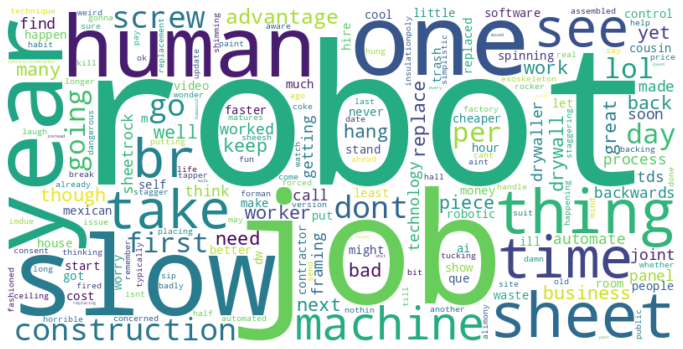

top 10 most frequent words
robot: 1.0000
job: 0.6818
slow: 0.5000
one: 0.4091
year: 0.4091
human: 0.4091
sheet: 0.3636
thing: 0.3636
time: 0.3182
take: 0.2727


In [21]:
from wordcloud import WordCloud

video = df_comments['video_id'].iloc[np.random.randint(0, len(df_comments))]

comments = get_comments_from_video(df_comments, video)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)

# Print wordcloud graph
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extract top 10 most frequent words and frequency
word_frequencies = wordcloud.words_
top_10_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:10]

print(f'top 10 most frequent words')
for word, freq in top_10_words:
    print(f"{word}: {freq:.4f}")

Merge dataframe with clean comments and clean transcriptions

In [21]:
# Create new dataframe
df_content = df_transcript.copy()
if 'Unnamed: 0' in df_content.keys():
    df_content.drop(columns='Unnamed: 0', inplace=True)

# Get unique video_ids
video_id_list = list(set(df_comments['video_id']))

# Get all coments from video id in a dataframe
df_wordcloud = []
for id in video_id_list:
    word_list = {
        'video_id': id,
        'comment_list': get_comments_from_video(df_comments, id)
    }
    df_wordcloud.append(word_list)
df_wordcloud = pd.DataFrame(df_wordcloud)

# Merge both dataframes to get Content dataframe
df_content = df_content.merge(df_wordcloud, on='video_id', how='left')
df_content.head()

,video_id,transcription,language,clean_text,comment_list
0,qtlUwwtvuEg,[Music] thank you hello everyone I hope you ar...,english,music thank hello everyone hope great era ai w...,great videohelpful\n thank well explained vide...
1,QaoDXYYtgK0,number three [Music] Facebook has enacted an e...,english,number three music facebook enacted emergency ...,quotthey invented code languagequot man thats ...
2,PqDwddEHswU,in this series we're going to introduce deep l...,english,series going introduce deep learning least per...,brian douglas hero\n learned far sitting couch...
3,B-Y7rnOa43w,this is how to earn money with AI and it's par...,english,earn money ai part two let go want create kind...,oh im going try\n brilliant
4,vyit-1zKsZ4,when current Medical Science has run out of op...,english,current medical science run option doctor dont...,locked syndrome lateral amyloid multiple scler...


Export Content dataframe (comments and transcripts merged)

In [22]:
df_content.to_csv('../data/clean_data/df_content.csv', index=False)

# Translate Comments to English

Text(0.5, 1.0, 'Videos with n_comments')

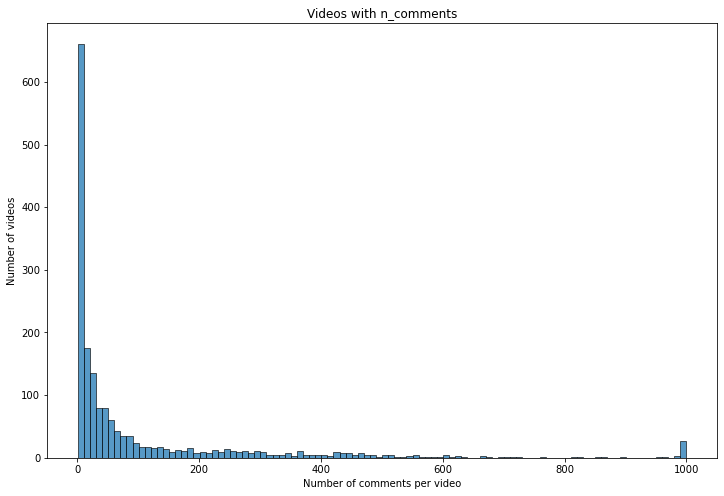

In [23]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df_comments['video_id'].value_counts(), bins=100, kde=False)
plt.xlabel('Number of comments per video')
plt.ylabel('Number of videos')
plt.title('Videos with n_comments')

In [24]:
from langdetect import detect, DetectorFactory, LangDetectException
from nltk.corpus import stopwords

# Create a column with language detected
def detect_language(text):
    try:
        # Verificar si el texto es lo suficientemente largo
        if len(text.strip()) == 0:
            return None
        # Intentar detectar el idioma
        language = detect(text)
        return language
    except LangDetectException:
        # Si el texto es demasiado corto o no se puede detectar el idioma, devolver None
        return None

In [25]:
# df_comments['language'] = df_comments['text'].apply(detect_language)

In [26]:
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

In [27]:
df_comments = 

SyntaxError: invalid syntax (4217298554.py, line 1)

In [ ]:
plt.figure(figsize=(20,10))
df_comments['language'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Language')
plt.ylabel('Total Comments')
plt.title('Comments per Languagee')
plt.show();

KeyError: 'language'

<Figure size 1440x720 with 0 Axes>

# Translate all non-english comments to english

In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text, target_language='en'):
    translator = GoogleTranslator(source='auto', target=target_language)
    return translator.translate(text)

In [ ]:
# Translate non-english comments to english
# df_comments['translation'] = df_comments[df_comments['language'] != 'en']['text'].apply(translate_text)

In [ ]:
df_comments[df_comments['language'] != 'en']['text'].iloc[:10].apply(translate_text)

0       great video,helpful.
10                   Awesome
11      ultimate information
15            important one.
20       very fruitful video
22                 Excellent
24                     great
27                   amazing
29    Alhamdulillah. perfect
31            highly amazing
Name: text, dtype: object

# Sentiment Analysis Comments using VADER

* neg: Proporción del texto que es negativa.
* neu: Proporción del texto que es neutral.
* pos: Proporción del texto que es positiva.
* compound: Puntaje general que va de -1 (muy negativo) a 1 (muy positivo)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

text = "I love this product! It's absolutely fantastic and works like a charm."

# Realizar el análisis de sentimiento
sentiment = analyzer.polarity_scores(text)

# Mostrar el resultado
print(sentiment)

{'neg': 0.0, 'neu': 0.371, 'pos': 0.629, 'compound': 0.9272}


In [ ]:
def get_sentiment(text, model):
    if type(text) != type('string'):
        return None
    sentiment = model.polarity_scores(text)
    return sentiment['compound']

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analysis only to English comments and create a new 'sentiment' column
df['sentiment'] = df.apply(lambda row: get_sentiment(row['clean_text'], analyzer), axis=1)

df.to_parquet('/content/df_trans_sent_comments.parquet', index=False)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analysis only to English comments and create a new 'sentiment' column
df_content['sentiment'] = df_content.apply(lambda row: get_sentiment(row['comment_list'], analyzer) if row['language'] == 'english' else None, axis=1)

# Display the resulting DataFrame
print(df_content[['comment_list', 'sentiment']])

                                           comment_list  sentiment
0     thank well explained video tutorial\n useful t...     1.0000
1     quotthey invented code languagequot man thats ...     1.0000
2     brian douglas hero\n learned far sitting couch...     0.9972
3                                       oh im going try     0.0000
4     locked syndrome lateral amyloid multiple scler...     0.9994
...                                                 ...        ...
1782  third qampa video series mit professor josh an...     0.8252
1783  thanks excellent introduction subject really a...     0.9990
1784                                                NaN        NaN
1785  good thing politician going get right finish d...     0.9988
1786                                                NaN        NaN

[1787 rows x 2 columns]


In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df_content['sentiment'], bins=50)
plt.show();

NameError: name 'df_content' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
df_content.to_csv('../data/clean_data/df_content.csv', index=False)

# Numerical Metrics

In [6]:
# Load the data
df_comments = pd.read_parquet('../data/clean_data/df_trans_sent_comments.parquet')
df_videos = pd.read_csv('../data/clean_data/df_video_data.csv')

In [7]:
df_numerical = df_videos.copy()

Feature engineering for `df_comments`and `df_videos`:
* Comment Age

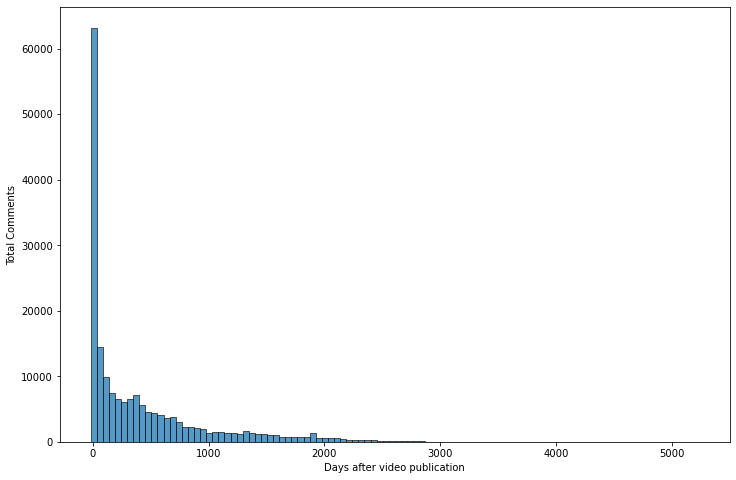

In [8]:
# Match name of column
df_videos.rename(columns={'videoId': 'video_id'}, inplace=True)
df_videos['publishedAt'] = pd.to_datetime(df_videos['publishedAt'])

# Merge both dataframes
df_merged = df_comments.merge(df_videos, on='video_id', how='left')

# Calculate comment's age
df_merged['comment_age_days'] = (df_merged['published_at'] - df_merged['publishedAt']).dt.days

# Plot the result
plt.figure(figsize=(12,8))
sns.histplot(df_merged['comment_age_days'], bins=100)
plt.ylabel('Total Comments')
plt.xlabel('Days after video publication')
plt.show();

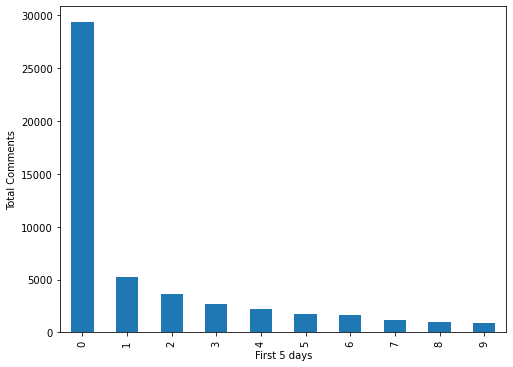

In [9]:
# Plot comments interaction firts days
plt.figure(figsize=(8, 6))
df_merged['comment_age_days'].value_counts()[:10].plot(kind='bar')
plt.xlabel('First 5 days')
plt.ylabel('Total Comments')
plt.show();

* Interation frequency

In [10]:
df_merged['likes_per_day'] = df_merged['like_count'] / df_merged['comment_age_days'].replace(0, 1)

In [11]:
len(df_merged[df_merged['comment_age_days'] < 0])

336

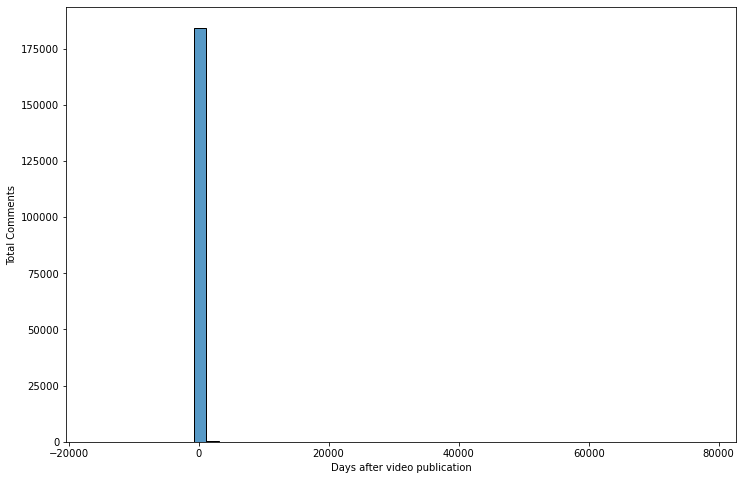

In [12]:
# Plot the result
plt.figure(figsize=(12,8))
sns.histplot(df_merged['likes_per_day'], bins=50)
plt.ylabel('Total Comments')
plt.xlabel('Days after video publication')
plt.show();

* Date Age

In [13]:
# Date age in days
df_videos['video_age_days'] = (datetime.now() - df_videos['publishedAt'].dt.tz_localize(None)).dt.days

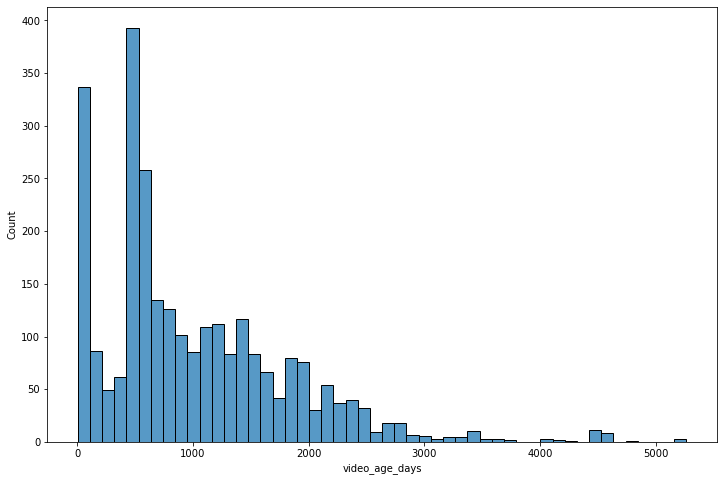

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(df_videos['video_age_days'], bins=50)
plt.show();

# SENTIMENT

In [ ]:
def sentiment_description(sentiment):
    if sentiment is None:
        return None
    if sentiment < -0.1:
        return('negative')
    if sentiment > 0.1:
        return('positive')
    else:
        return('neutral')

df_merged['sentiment_text_trans'] = df_merged['sentiment_trans'].apply(sentiment_description)

* Weighted Sentiment Analysis

$$
\text{sentiment\_media\_video} = \frac{\sum_{i=1}^{n} \left(\text{sentiment\_comment}_i \times (\text{n\_likes\_per\_comment}_i + 1)\right)}{\text{n\_comments} + \text{n\_likes\_total}}
$$

In [15]:
# Calculate sentiment_score * likes
df_merged['likes_x_sentiment'] = df_merged['like_count'] * df_merged['sentiment'] + 1

# Sum of (sentiment_score * likes) per video
df_likes_comments_sum = df_merged.groupby('video_id')['likes_x_sentiment'].sum().reset_index()
df_n_comments = df_merged.groupby('video_id')['comment_id'].agg(total_comments = 'count').reset_index()
df_n_likes = df_merged.groupby('video_id')['like_count'].agg(total_comments_likes = 'sum').reset_index()
df_n_reply = df_merged.groupby('video_id')['totalReplyCount'].agg(total_reply_count = 'sum').reset_index()

In [16]:
df_videos = df_videos.merge(df_likes_comments_sum, on='video_id', how='left')
df_videos = df_videos.merge(df_n_comments, on='video_id', how='left')
df_videos = df_videos.merge(df_n_likes, on='video_id', how='left')

df_videos['weighted_sentiment'] = df_videos['likes_x_sentiment'] / (df_videos['total_comments'] + df_videos['total_comments_likes'])

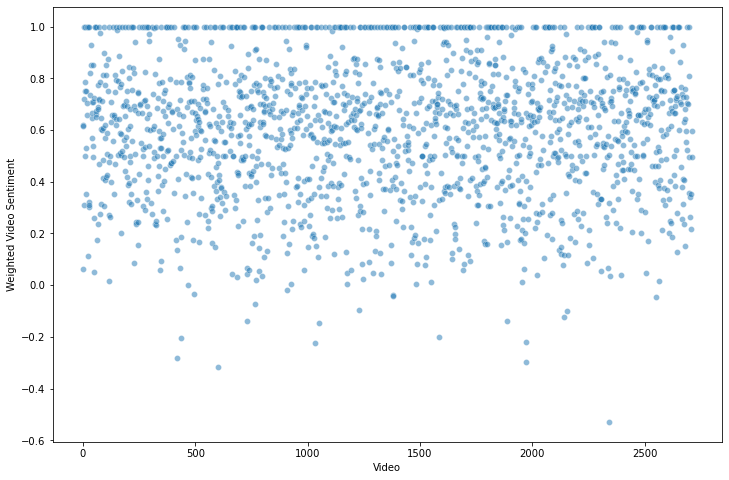

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_videos['weighted_sentiment'], alpha=0.5)
plt.ylabel('Weighted Video Sentiment')
plt.xlabel('Video')
plt.show();

In [21]:
def sentiment_description(sentiment):
    if sentiment is None:
        return None
    if sentiment < -0.1:
        return('negative')
    if sentiment > 0.1:
        return('positive')
    else:
        return('neutral')

df_merged['sentiment_text_trans'] = df_merged['weighted_sentiment'].apply(sentiment_description)

KeyError: 'weighted_sentiment'

In [ ]:
plt.figure(figsize=(12,8))
df_videos['weighted_sentiment'], alpha=0.5)
plt.ylabel('Video Sentiment')
plt.show();

In [18]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              2711 non-null   object             
 1   title                 2711 non-null   object             
 2   channelId             2711 non-null   object             
 3   description           2535 non-null   object             
 4   publishedAt           2711 non-null   datetime64[ns, UTC]
 5   thumbnail_url         2711 non-null   object             
 6   tags                  2711 non-null   object             
 7   categoryId            2711 non-null   int64              
 8   viewCount             2711 non-null   int64              
 9   likeCount             2711 non-null   int64              
 10  commentCount          2711 non-null   int64              
 11  licensed              2711 non-null   bool               
 12  durati

Integrate `df_channel`relevant columns

In [19]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        2010 non-null   object
 1   title             2010 non-null   object
 2   description       1857 non-null   object
 3   published_at      2010 non-null   object
 4   subscriber_count  2010 non-null   int64 
 5   video_count       2010 non-null   int64 
 6   view_count        2010 non-null   int64 
 7   region            1583 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.8+ KB


In [20]:
# Add channel_age
df_channel['channel_age_days'] = (datetime.now() - df_channel['published_at'].dt.tz_localize(None)).dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_videos = df_videos.merge(df_channel[['channel_id', 'subscriber_count', 'video_count', 'view_count', 'region', 'channel_age_days']], how='left', left_on='channelId', right_on='channel_id')

In [ ]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              2711 non-null   object             
 1   title                 2711 non-null   object             
 2   channelId             2711 non-null   object             
 3   description           2535 non-null   object             
 4   publishedAt           2711 non-null   datetime64[ns, UTC]
 5   thumbnail_url         2711 non-null   object             
 6   tags                  2711 non-null   object             
 7   categoryId            2711 non-null   int64              
 8   viewCount             2711 non-null   int64              
 9   likeCount             2711 non-null   int64              
 10  commentCount          2711 non-null   int64              
 11  licensed              2711 non-null   bool               
 12  durati

Merge `df_channel`for better understanding of categories

In [ ]:
df_categories.info()

# Add categories values to general dataframe
df_videos = df_videos.merge(df_categories, how='left', left_on='categoryId', right_on='id')

# Apply one-hot-encoding
df_videos = pd.concat([df_videos, pd.get_dummies(df_videos['category'], prefix='category')], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        31 non-null     int64 
 1   category  31 non-null     object
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


Nummerical columns from `df_videos`

In [ ]:
# List of nummerical relevant columns
numerical_columns = ['viewCount', 
                      'likeCount', 
                      'commentCount',
                      'total_comments_likes',
                      'licensed', 
                      'duration', 
                      'video_age_days', 
                      'weighted_sentiment',
                      'subscriber_count',
                      'video_count',
                      'view_count',
                      'channel_age_days',
                      'category_Autos & Vehicles',
                      'category_Comedy',
                      'category_Education',
                      'category_Entertainment',
                      'category_Film & Animation',
                      'category_Gaming',
                      'category_Howto & Style',
                      'category_Music',
                      'category_News & Politics',
                      'category_People & Blogs',
                      'category_Pets & Animals',
                      'category_Science & Technology',
                      'category_Sports',
                      'category_Travel & Events'
                      ]

df_videos[numerical_columns].iloc[:5]

,viewCount,likeCount,commentCount,total_comments_likes,licensed,duration,video_age_days,weighted_sentiment,subscriber_count,video_count,...,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,268029,8091,381,290.0,True,1499,480,0.619445,32600,143,...,False,False,False,False,False,False,False,False,False,False
1,3369370,35258,5948,71377.0,False,159,2579,0.062779,18900,5,...,False,False,False,False,False,False,False,False,False,False
2,143984,2575,36,120.0,False,883,1228,0.615898,521000,2741,...,False,False,False,False,False,False,False,True,False,False
3,2430,270,3,0.0,True,44,504,1.000000,60700,909,...,False,False,False,False,False,False,False,True,False,False
4,113233,2030,84,279.0,True,1706,619,0.311447,5700000,1154,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_videos[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   viewCount                      2711 non-null   int64  
 1   likeCount                      2711 non-null   int64  
 2   commentCount                   2711 non-null   int64  
 3   total_comments_likes           1767 non-null   float64
 4   licensed                       2711 non-null   bool   
 5   duration                       2711 non-null   int64  
 6   video_age_days                 2711 non-null   int64  
 7   weighted_sentiment             1767 non-null   float64
 8   subscriber_count               2711 non-null   int64  
 9   video_count                    2711 non-null   int64  
 10  view_count                     2711 non-null   int64  
 11  channel_age_days               2711 non-null   int64  
 12  category_Autos & Vehicles      2711 non-null   b

Address the Nan values

In [ ]:
#Detect problematic videos
df_videos[(df_videos['total_comments_likes'].isna()) & (df_videos['commentCount'] > 0)][['video_id', 'commentCount', 'total_comments_likes']]

# Data of video 'ANIw1Mz1SRI' wasn't fetched correctly, so it will be removed from the dataset
df_videos = df_videos[df_videos['video_id'] != 'ANIw1Mz1SRI'].copy()

# Fill remaining total_comments_like values with 0
df_videos['total_comments_likes'].fillna(0, inplace=True)

# Fill Nan 'weighted_sentiment' with neutral sentiment = 0
df_videos['weighted_sentiment'].fillna(0, inplace=True)

/tmp/ipykernel_762/2090152948.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_videos['total_comments_likes'].fillna(0, inplace=True)
/tmp/ipykernel_762/2090152948.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df_videos[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2710 entries, 0 to 2710
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   viewCount                      2710 non-null   int64  
 1   likeCount                      2710 non-null   int64  
 2   commentCount                   2710 non-null   int64  
 3   total_comments_likes           2710 non-null   float64
 4   licensed                       2710 non-null   bool   
 5   duration                       2710 non-null   int64  
 6   video_age_days                 2710 non-null   int64  
 7   weighted_sentiment             2710 non-null   float64
 8   subscriber_count               2710 non-null   int64  
 9   video_count                    2710 non-null   int64  
 10  view_count                     2710 non-null   int64  
 11  channel_age_days               2710 non-null   int64  
 12  category_Autos & Vehicles      2710 non-null   bool  

In [ ]:
df_videos.to_csv('../data/clean_data/df_videos_modelling.csv', index=False)

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

video_ids = df_videos['video_id']

videos_standardized = scaler.fit_transform(df_videos[numerical_columns])

df_videos_standardized = pd.DataFrame(videos_standardized, columns=numerical_columns)

df_videos_standardized = pd.concat([video_ids, df_videos_standardized], axis=1)

In [ ]:
df_videos_standardized.head()

,video_id,viewCount,likeCount,commentCount,total_comments_likes,licensed,duration,video_age_days,weighted_sentiment,subscriber_count,...,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,qtlUwwtvuEg,-0.025962,-0.017246,0.021028,-0.096125,1.080740,0.059947,-0.633293,0.622073,-0.284323,...,-0.072062,-0.077066,-0.104004,-0.06384,-0.277681,-0.415515,-0.027176,-0.698124,-0.019213,-0.060858
1,QaoDXYYtgK0,1.805809,0.379270,2.783664,2.748875,-0.925292,-0.342024,1.888126,-0.926706,-0.287248,...,-0.072062,-0.077066,-0.104004,-0.06384,-0.277681,-0.415515,-0.027176,-0.698124,-0.019213,-0.060858
2,PqDwddEHswU,-0.099227,-0.097755,-0.150179,-0.102929,-0.925292,-0.124840,0.265240,0.612203,-0.180039,...,-0.072062,-0.077066,-0.104004,-0.06384,-0.277681,-0.415515,-0.027176,1.432411,-0.019213,-0.060858
3,B-Y7rnOa43w,-0.182834,-0.131398,-0.166555,-0.107731,1.080740,-0.376522,-0.604464,1.680867,-0.278323,...,-0.072062,-0.077066,-0.104004,-0.06384,-0.277681,-0.415515,-0.027176,1.432411,-0.019213,-0.060858
4,vyit-1zKsZ4,-0.117390,-0.105710,-0.126358,-0.096565,1.080740,0.122043,-0.466320,-0.234853,0.925785,...,-0.072062,-0.077066,-0.104004,-0.06384,-0.277681,-0.415515,-0.027176,-0.698124,-0.019213,-0.060858


# Correlation Matrix

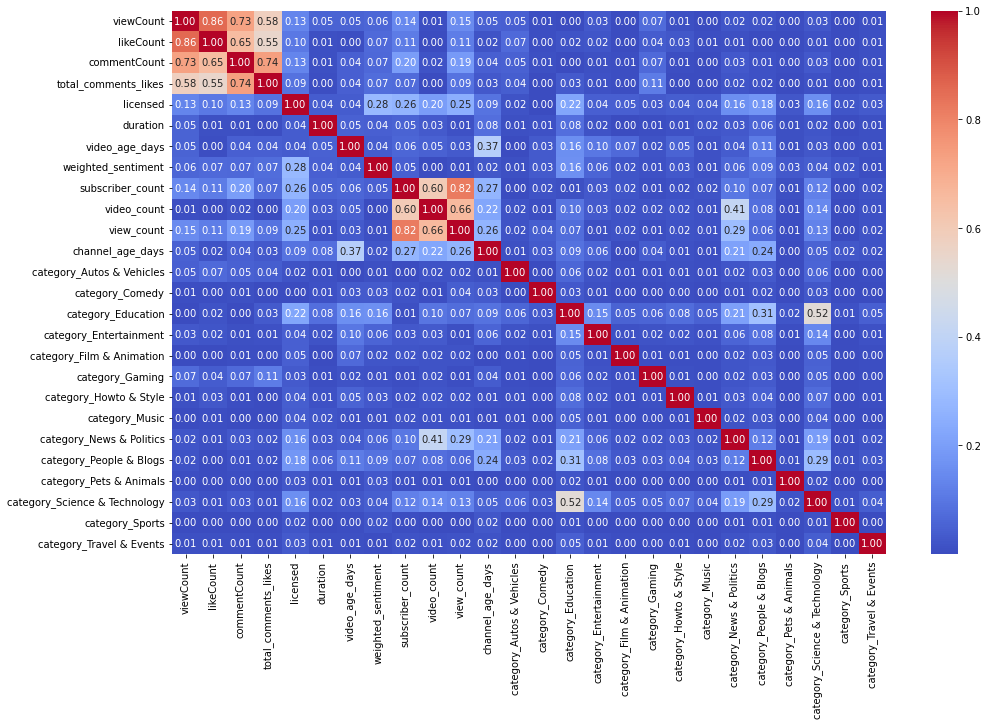

In [ ]:
# Create correlation matrix
correlation_matrix = df_videos_standardized[numerical_columns].corr()

plt.figure(figsize=(16,10))
sns.heatmap(np.abs(correlation_matrix), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show();

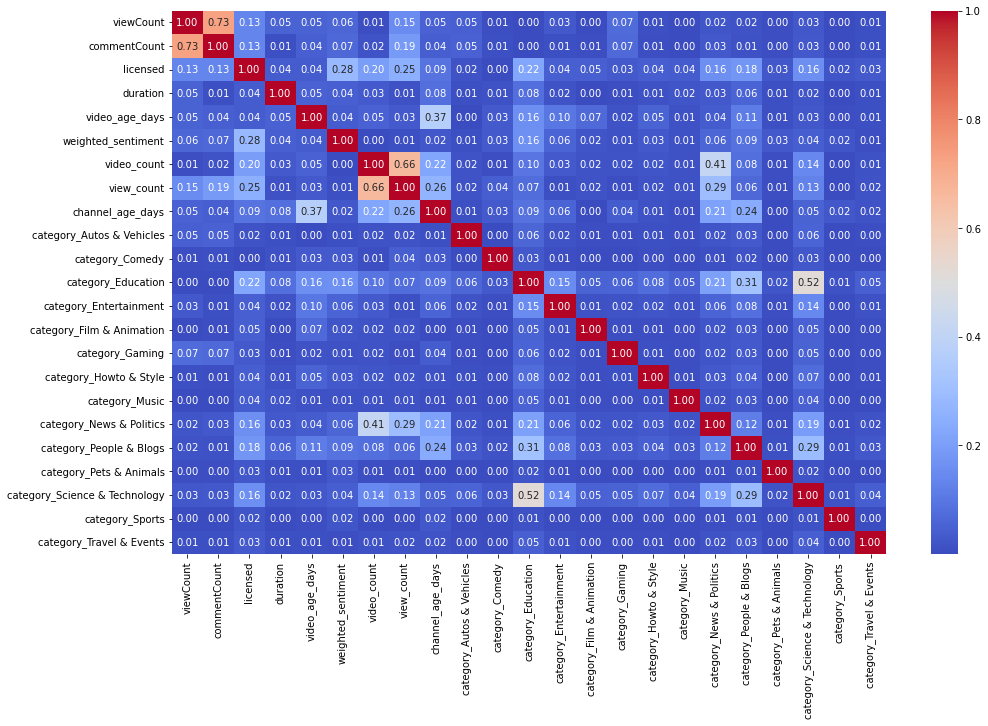

In [ ]:
# Let's remove the highest correlated variables
high_correlation_variables = ['likeCount', 'total_comments_likes', 'subscriber_count']

# Drop the columns from standardize dataset
numerical_columns_clean = [column for column in numerical_columns if column not in high_correlation_variables]

# Re-plot the new correlation matrix
correlation_matrix = df_videos_standardized[numerical_columns_clean].corr()
plt.figure(figsize=(16,10))
sns.heatmap(np.abs(correlation_matrix), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show();

In [ ]:
df_videos_standardized.dropna(inplace=True)

# K-Means Clustering for Relevance Labeling

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(df_videos_standardized[numerical_columns_clean].dropna())

df_videos_standardized['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='cluster'>

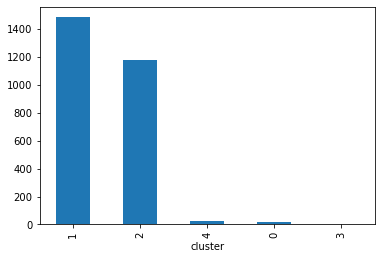

In [ ]:
df_videos_standardized['cluster'].value_counts().plot(kind='bar')

In [ ]:
# Cluster Analysis
# View the number of videos in each cluster
cluster_counts = df_videos_standardized['cluster'].value_counts()
print(cluster_counts)

# Analyze the characteristics of each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns_clean)
print(cluster_centers)

cluster
1    1485
2    1177
4      27
0      16
3       4
Name: count, dtype: int64
   viewCount  commentCount  licensed  duration  video_age_days  \
0   0.916832      0.895021  0.453855 -0.098854       -0.205049   
1  -0.098062     -0.098049 -0.307947 -0.056372       -0.134319   
2  -0.054183     -0.080013  0.358092  0.077549        0.167361   
3   0.189483      0.223375  0.077724 -0.339625       -0.905676   
4   7.189350      8.319171  1.006443 -0.157304        0.371128   

   weighted_sentiment  video_count  view_count  channel_age_days  \
0           -0.189691    -0.208137   -0.073839          0.494450   
1           -0.115717    -0.209523   -0.202576         -0.213996   
2            0.169105     0.259223    0.204239          0.260251   
3           -0.830658    -0.171270    1.117728         -0.877679   
4           -0.758190     0.278989    1.706480          0.232104   

   category_Autos & Vehicles  ...  category_Film & Animation  category_Gaming  \
0                  -0.079452 

In [ ]:
from sklearn.decomposition import PCA

# Initialize the PCA model (for 2 components)
pca = PCA(n_components=2)

# Fit and transform the data
pca_components = pca.fit_transform(df_videos_standardized[numerical_columns_clean])

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Add the cluster labels from K-Means to this DataFrame
df_pca['cluster'] = df_videos_standardized['cluster']

# Display the first few rows of the PCA DataFrame
print(df_pca.head())

       PCA1      PCA2  cluster
0 -0.075498  1.337920      2.0
1  0.660503 -2.016773      1.0
2 -0.195160 -0.138563      1.0
3 -0.643073 -0.001628      1.0
4  0.549875  1.210064      2.0


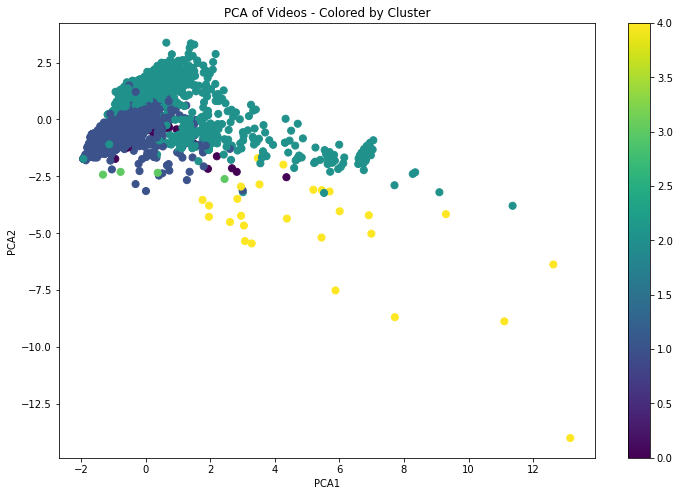

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.colorbar()
plt.title('PCA of Videos - Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

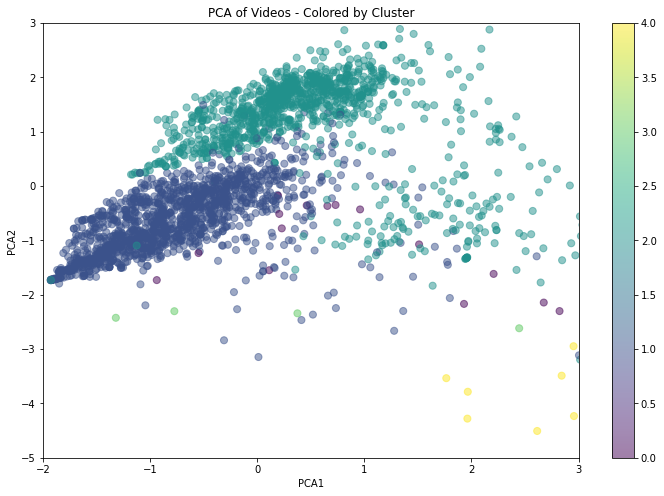

In [ ]:
# Zooming
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.colorbar()
plt.title('PCA of Videos - Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Zoom
plt.xlim(-2, 3)
plt.ylim(-5, 3)

plt.savefig('../assets/video_clustering_kmeans.jpg', dpi=300)

plt.show()

# DBSCAN Clustering

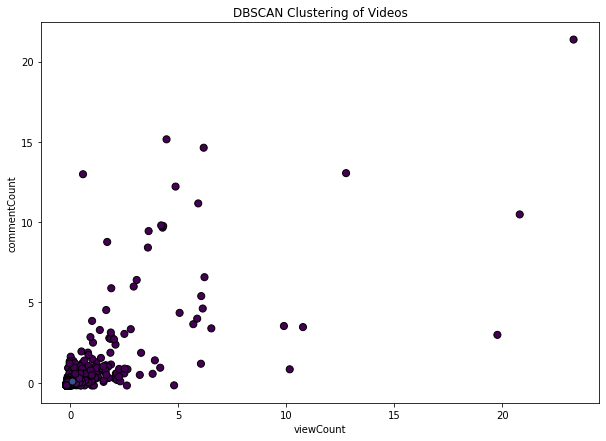

Estimated number of clusters: 35
Estimated number of noise points: 1224


In [ ]:
from sklearn.cluster import DBSCAN

# eps: The maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_videos_standardized[numerical_columns_clean])

# Add the cluster labels to the DataFrame
df_videos_standardized['cluster'] = clusters

# Plotting the clustering result using the first two features
plt.figure(figsize=(10, 7))
plt.scatter(df_videos_standardized[numerical_columns_clean[0]], df_videos_standardized[numerical_columns_clean[1]], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Videos')
plt.xlabel(numerical_columns_clean[0])
plt.ylabel(numerical_columns_clean[1])
plt.show()

# Analyzing the results
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

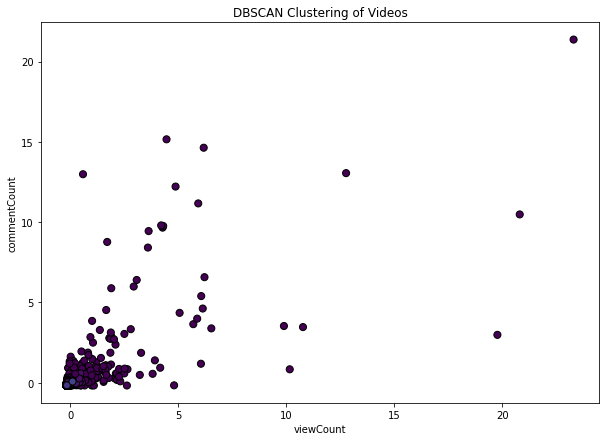

Estimated number of clusters: 25
Estimated number of noise points: 761


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming df_videos_standardized and numerical_columns_clean are already defined
# Apply DBSCAN

X = df_videos_standardized[numerical_columns_clean]
min_samples = 5

dbscan = DBSCAN(eps=0.7, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Add the cluster labels to the DataFrame
df_videos_standardized['cluster'] = clusters

# Plotting the clustering result using the first two features
plt.figure(figsize=(10, 7))
plt.scatter(X['viewCount'], X['commentCount'], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Videos')
plt.xlabel(numerical_columns_clean[0])
plt.ylabel(numerical_columns_clean[1])
plt.show()

# Analyzing the results
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


<AxesSubplot:xlabel='cluster'>

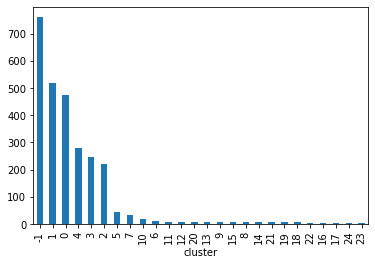

In [ ]:
df_videos_standardized['cluster'].value_counts().plot(kind='bar')

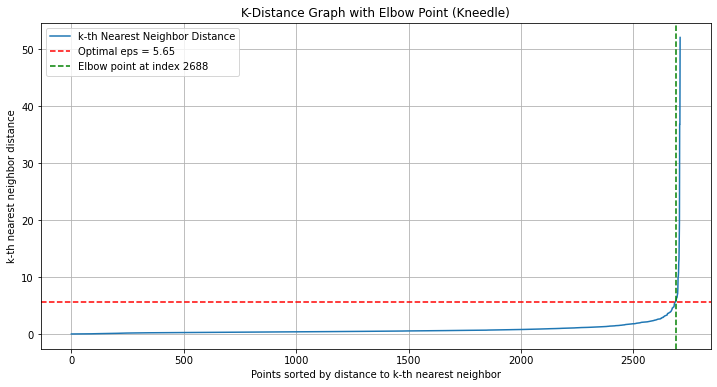

Optimal eps value: 5.6511524367789665


In [ ]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Setting 'k' equal to min_samples - 1 (assuming min_samples is 4 for this example)
k = min_samples - 1

# Initialize NearestNeighbors with n_neighbors as 'k'
# Use the 'ball_tree' algorithm for efficient distance computation
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)

# Find the distance to the k-th nearest neighbor for each point
# distances: Array of distances to k-th nearest neighbor
# indices: The indices of the k-th nearest neighbor in the dataset
distances, indices = nbrs.kneighbors(X)

# Sort the distances
sorted_distances = np.sort(distances[:, k-1], axis=0)

# Use the KneeLocator to find the elbow
kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, curve='convex', direction='increasing')
optimal_eps = sorted_distances[kneedle.elbow]

# Plotting the k-distance Graph
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances, label='k-th Nearest Neighbor Distance')
plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f'Optimal eps = {optimal_eps:.2f}')
plt.axvline(x=kneedle.elbow, color='g', linestyle='--', label=f'Elbow point at index {kneedle.elbow}')
plt.title('K-Distance Graph with Elbow Point (Kneedle)')
plt.xlabel('Points sorted by distance to k-th nearest neighbor')
plt.ylabel('k-th nearest neighbor distance')
plt.legend()
plt.grid(True)
plt.show()

print(f'Optimal eps value: {optimal_eps}')

In [ ]:
df_videos_standardized.to_csv('../data/clean_data/df_videos_standardized.csv', index=False)

# DBScan with PCA Components

In [ ]:
from sklearn.decomposition import PCA

X = df_videos_standardized[numerical_columns_clean].copy()   

# Initialize the PCA model for 2 components
pca = PCA(n_components=3)

# Fit and transform the data using PCA
pca_components = pca.fit_transform(X)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])

# Apply DBScan using one of the previously suggested combinations
dbscan_model = DBSCAN(eps=0.7, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X)

# Add the DBScan cluster labels to the PCA DataFrame
df_pca['cluster'] = dbscan_labels

# Display the first few rows of the PCA DataFrame
df_pca.head()

,PCA1,PCA2,PCA3,cluster
0,-0.075498,1.337920,0.707702,0
1,0.660503,-2.016773,2.800685,-1
2,-0.195160,-0.138563,-0.450388,10
3,-0.643073,-0.001628,-0.142534,1
4,0.549875,1.210064,0.345187,0


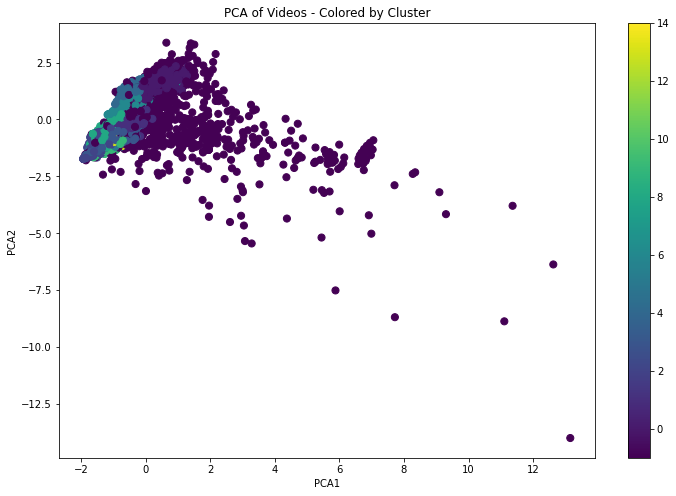

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.colorbar()
plt.title('PCA of Videos - Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Hierarchical Clustering

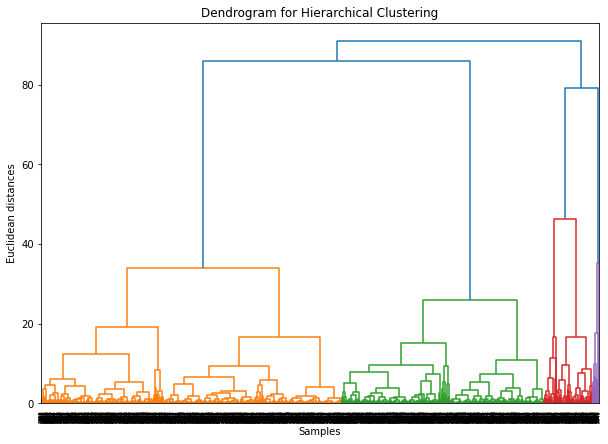

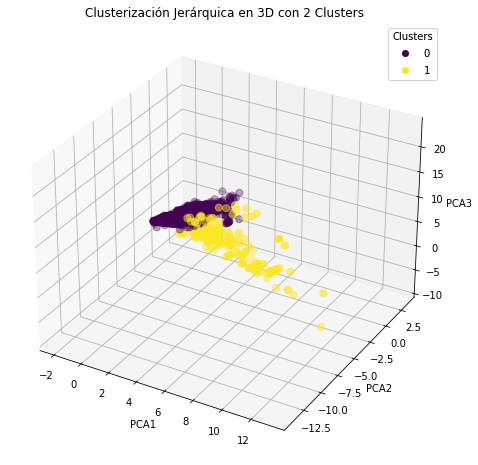

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X_pca = pca_components

# Perform hierarchical clustering using Ward's method
linked = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters = 2
# Perform Agglomerative Clustering based on the dendrogram
# We can decide on the number of clusters based on the dendrogram, let's start with 2 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_labels = hierarchical_clustering.fit_predict(X_pca)

# Add the cluster labels to the PCA DataFrame
df_pca_hc = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_hc['cluster'] = hc_labels

# Visualizar la clusterización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos con los clusters obtenidos
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=hc_labels, cmap='viridis', s=50)

# Añadir etiquetas y título
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(f'Clusterización Jerárquica en 3D con {n_clusters} Clusters')

# Añadir una barra de colores
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

<AxesSubplot:xlabel='cluster'>

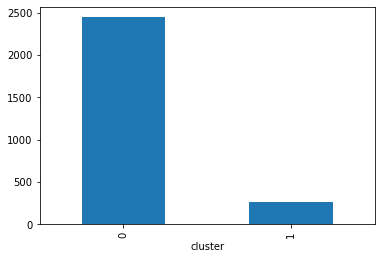

In [ ]:
df_pca_hc['cluster'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming clusters are the labels assigned by the GMM model
sil_score = silhouette_score(X_pca, hc_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5981995876670587


# GMM Clustering

In [ ]:
from sklearn.mixture import GaussianMixture

X_scaled = df_videos_standardized[numerical_columns_clean].copy()

# Define the GMM model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)

# Fit the model to the data
gmm.fit(X_scaled)

# Predict the clusters for each data point
clusters = gmm.predict(X_scaled)

# Add the cluster labels to your dataframe
df_videos_standardized['GMM_cluster'] = clusters

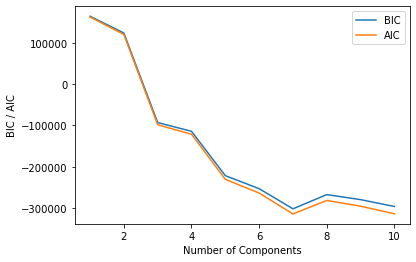

In [ ]:
n_components = range(1, 11)
gmm_models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_scaled) for n in n_components]

# Calculate BIC and AIC
bics = [model.bic(X_scaled) for model in gmm_models]
aics = [model.aic(X_scaled) for model in gmm_models]

# Plot the BIC and AIC scores
import matplotlib.pyplot as plt

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('BIC / AIC')
plt.legend()
plt.show()

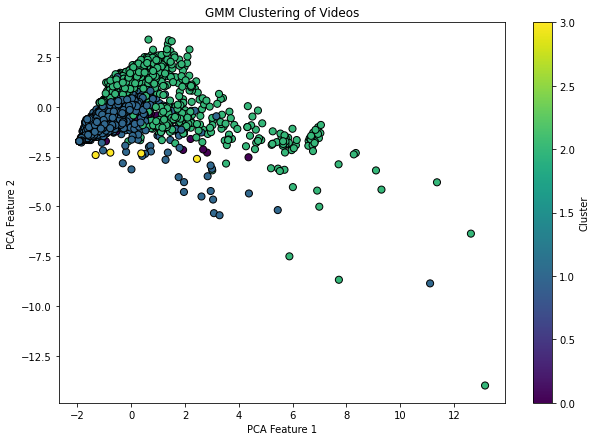

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the GMM clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title('GMM Clustering of Videos')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

<AxesSubplot:xlabel='GMM_cluster'>

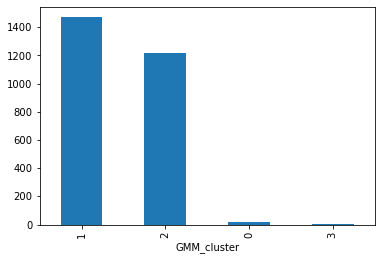

In [ ]:
df_videos_standardized['GMM_cluster'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming clusters are the labels assigned by the GMM model
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.1690645094809692
